# EJERCICIO 2. CÁLCULO DE MEDIDAS DE TENDENCIA CENTRAL

Autora: Brenda Ortiz Soto

En este ejercicio, se obtendrán la moda, la media y la mediana de un set de datos. Igualmente, se graficarán histogramas de los sets de datos. Esta vez vamos a usar las librerías: Pandas, Matplotlib, NumPy, SciPy, y Seaborn.

Para obtener el *data set* puedes dar clic [aquí.](https://www.kaggle.com/usgs/earthquake-database)


Dicho  *data set* corresponde con información de sismos de magnitud 5.5 o mayor, que han ocurrido en todo el mundo desde 1965 hasta el 2016, e incluye la fecha y hora de ocurrencia, localidad del sismo, magnitud y profundidad. La información fue recolectada por el "Eartquake Information Center (NEIC)", encuentra más información del NEIC [aquí.](https://www.usgs.gov/natural-hazards/earthquake-hazards/national-earthquake-information-center-neic?qt-science_support_page_related_con=3#qt-science_support_page_related_con.)


## Importación de librerías y lectura de datos

In [1]:
#Importar librerías y asignarles un nombre corto
import pandas as pd              
import matplotlib.pyplot as plt   
import numpy as np 
from scipy import stats 
import seaborn as sns
import matplotlib.mlab as mlab
#puedes darte cuenta que importamos más librerías que en el ejercio anterior
#la razón: cada librería cuenta con funciones específicas y diferentes

In [2]:
datos = pd.read_csv('e2_datos.csv') #los datos deben estar guardados en la misma carpeta que el Jupyter Notebook 

In [3]:
datos.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
datos.shape  #para saber cuantas filas y columnas contiene el dataframe

(23412, 21)

In [5]:
#De nuestro datos originales, haremos un dataframe llamado datos1 que sólo incluya las columnas correspondientes a fecha, hora, latitud, longitud, profundidad y magnitud
datos1 = datos[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
datos1.head() #para mostrar las primeras 5 líneas del dataframe

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [6]:
#comprobamos que el dataset no contenga datos nulos
valores_nulos = datos1.isnull().sum()
valores_nulos
#podemos observar que el dataframe está completo y no requiere modificar o borrar datos como en el ejercicio 1

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
dtype: int64

## Resumen estadístico

Python nos permite obtener un resumen estadístico de cada variable o de la variable que le especifiquemos, mediante el cual obtenemos: el conteo total, el promedio, desviación estándar, valor mínimo, cuartiles y valor máximo. Obteniendo el resumen estadístico de todas las variables:

In [7]:
datos1.describe().transpose()   #dataframe.describe().transpose
#en este caso, no nos es de utilidad obtener los datos estadísticos de la latitud y longitud pero se incluyen como ejemplo

,count,mean,std,min,25%,50%,75%,max
Latitude,23412.0,1.679033,30.113183,-77.080,-18.65300,-3.5685,26.19075,86.005
Longitude,23412.0,39.639961,125.511959,-179.997,-76.34975,103.9820,145.02625,179.998
Depth,23412.0,70.767911,122.651898,-1.100,14.52250,33.0000,54.00000,700.000
Magnitude,23412.0,5.882531,0.423066,5.500,5.60000,5.7000,6.00000,9.100


Y si queremos visualizar el resumen estadístico para una variable, en este caso para la magnitud:

In [8]:
datos1['Magnitude'].describe() # la sintaxis es: nombre_archivo['variable'].describe()

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

Obteniendo las medidas de tendencia central. De la lista, promedio es el mean y la mediana es el estadístico que dice 50%

In [9]:
#la sintaxis para obtener la moda de la variable 'Magnitude' es: nombre_archivo['variable'].mode
#notar que sólo imprime los resultados, si deseamos guardar los datos, debemos crear variables para guardarlos
#Para este ejercicio sólo guardaremos la media y la desviación estándar 
datos1['Magnitude'].mode()  

0    5.5
dtype: float64

In [10]:
#la sintaxis para obtener la mediana de la variable 'Magnitude' es: nombre_archivo['variable'].median
datos1['Magnitude'].median()

5.7

In [11]:
#la sintexis para obtener la media de la variable 'Magnitude' es: nombre_archivo['variable'].mean
media = datos1['Magnitude'].mean()
media

5.882530753460003

In [12]:
#la sintexis para obtener la media geométrica de la variable 'Magnitude' es: stats.gmean(nombre_archivo['variable'])
stats.gmean(datos1['Magnitude'])

5.868444764632867

Puedes notar que mediante el método describe obtuvimos la media (mean) y la mediana (la cual corresponde con el segundo cuartil o 50%). También obtuvimos dichos valores con las funciones mean y median que pertenecen al módulo stats de scipy (fíjate en la primera celda de este ejercicio, ahí es donde importamos stats)

Ahora obtengamos las medidas de dispersión:

In [13]:
#la sintaxis para obtener la varianza de la variable 'Magnitude' es: nombre_archivo['variable'].var()
datos1['Magnitude'].var()

0.17898453516966728

In [14]:
#la sintexis para obtener la desviación estándar de la variable 'Magnitude' es: nombre_archivo['variable'].std
std = datos1['Magnitude'].std()
std

0.4230656393157772

In [15]:
#la sintexis para obtener los cuartiles de la variable 'Magnitude' es: nombre_archivo['variable'].quntile([.25,.5,.75])
datos1['Magnitude'].quantile([.25,.5,.75])

0.25    5.6
0.50    5.7
0.75    6.0
Name: Magnitude, dtype: float64

In [16]:
#Imaginemos que quieres calcular percentiles de la variable 'Magnitude' es: nombre_archivo['variable'].quntile([percentil])
#Por ejemplo el percentil 80 y el 90
datos1['Magnitude'].quantile([.8,.9])

0.8    6.1
0.9    6.4
Name: Magnitude, dtype: float64

## Agrupación de datos

In [17]:
#Imaginemos que también queremos agrupar todos los datos por "Magnitud" y definir sus parámetros estadísticos a partir de datos agrupados
grouped_data = datos1.groupby('Magnitude') #datos agrupados por magnitud
grouped_data.describe()

Latitude                                                      \
             count       mean        std      min       25%        50%   
Magnitude                                                                
5.50        4685.0   0.559046  30.477473 -77.0800 -20.39100  -4.133000   
5.51           1.0  34.144000        NaN  34.1440  34.14400  34.144000   
5.52           4.0  37.476125   0.441895  37.2315  37.24975  37.267333   
5.53           1.0  34.162000        NaN  34.1620  34.16200  34.162000   
5.54           1.0  37.300500        NaN  37.3005  37.30050  37.300500   
...            ...        ...        ...      ...       ...        ...   
8.40           2.0 -10.351500   8.362952 -16.2650 -13.30825 -10.351500   
8.60           2.0   2.206000   0.171120   2.0850   2.14550   2.206000   
8.70           1.0  51.251000        NaN  51.2510  51.25100  51.251000   
8.80           1.0 -36.122000        NaN -36.1220 -36.12200 -36.122000   
9.10           2.0  20.796000  24.750152   3.2950  12.04550  20.796000   

                                Longitude              ...              \
                 75%        max     count        mean  ...         75%   
Magnitude                                              ...               
5.50       23.532000  85.735000    4685.0   34.785978  ...  143.473000   
5.51       34.144000  34.144000       1.0 -117.697000  ... -117.697000   
5.52       37.493708  38.138333       4.0 -116.886375  ... -116.354458   
5.53       34.162000  34.162000       1.0 -116.852000  ... -116.852000   
5.54       37.300500  37.300500       1.0 -116.534167  ... -116.534167   
...              ...        ...       ...         ...  ...         ...   
8.40       -7.394750  -4.438000       2.0   13.863000  ...   57.615000   
8.60        2.266500   2.327000       2.0   95.085500  ...   96.096750   
8.70       51.251000  51.251000       1.0  178.715000  ...  178.715000   
8.80      -36.122000 -36.122000       1.0  -72.898000  ...  -72.898000   
9.10       29.546500  38.297000       2.0  119.177500  ...  130.775250   

                        Depth                                                 \
                  max   count       mean         std     min     25%     50%   
Magnitude                                                                      
5.50       179.984000  4685.0  70.856438  120.984309   0.000  15.000  33.000   
5.51      -117.697000     1.0   3.292000         NaN   3.292   3.292   3.292   
5.52      -116.311833     4.0   3.575000    2.807579   0.900   1.275   3.700   
5.53      -116.852000     1.0   9.615000         NaN   9.615   9.615   9.615   
5.54      -116.534167     1.0   1.200000         NaN   1.200   1.200   1.200   
...               ...     ...        ...         ...     ...     ...     ...   
8.40       101.367000     2.0  33.500000    0.707107  33.000  33.250  33.500   
8.60        97.108000     2.0  25.000000    7.071068  20.000  22.500  25.000   
8.70       178.715000     1.0  30.300000         NaN  30.300  30.300  30.300   
8.80       -72.898000     1.0  22.900000         NaN  22.900  22.900  22.900   
9.10       142.373000     2.0  29.500000    0.707107  29.000  29.250  29.500   

                            
              75%      max  
Magnitude                   
5.50       56.900  700.000  
5.51        3.292    3.292  
5.52        6.000    6.000  
5.53        9.615    9.615  
5.54        1.200    1.200  
...           ...      ...  
8.40       33.750   34.000  
8.60       27.500   30.000  
8.70       30.300   30.300  
8.80       22.900   22.900  
9.10       29.750   30.000  

[64 rows x 24 columns]

## Elaboración de histograma

Interpretar datos puede ser más fácil si utilizamos gráficas para su representación. Visualizemos los datos en un histograma y en un diagrama de caja o *boxplot*.

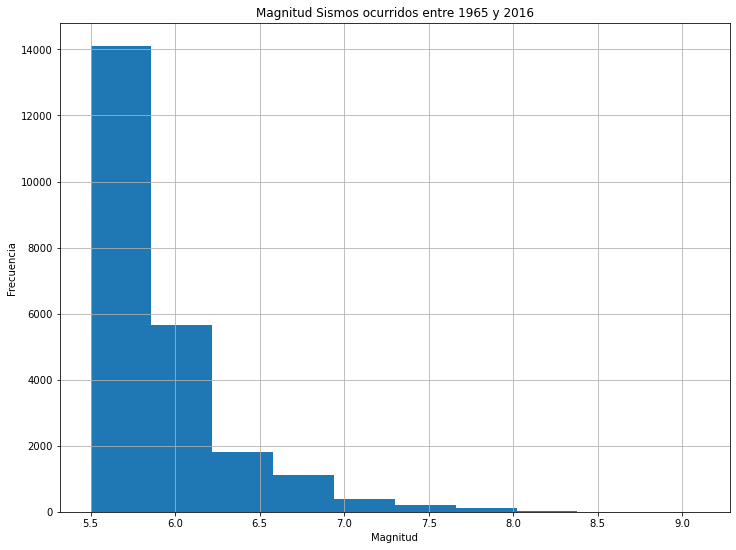

In [18]:
datos1['Magnitude'].hist(figsize=(12,9),bins=10)       # la sintaxis es: nombre_archivo['variable'].hist(figsize=(ancho, alto)) 
#bins=10 indica que queremos que el histograma tenga 10 clases
plt.title('Magnitud Sismos ocurridos entre 1965 y 2016')  #etiqueta el título del histograma
plt.xlabel("Magnitud")                   #etiqueta eje "y"
plt.ylabel("Frecuencia")                 #etiqueta eje "y"
plt.show()                               #para visualizar el histograma

De la gráfica anterior podemos observar que la mayoría de los sismos ocurridos en los últimos 51 años han sido de magnitud 5.5 y conforme aumenta la magnitud son menos frecuentes, ¿te lo imaginabas? 

También te puedes dar cuenta que estos datos presentan una distribución lognormal (la mayor "carga de datos" se encuentra hacia la izquierda o sesgada la izquierda o sesgo positivo)

Del coeficiente de simetría sabemos que si este es mayor que 1, la distribución es asimétrica positiva mientras que si es menor que 1 es asimétrica negativa. Podemos observarlo en la gráfica y calcularlo de la siguiente manera:

In [19]:
asimetria = stats.skew(datos1['Magnitude'])
asimetria

1.8482272812598326

## Graficando *boxplot*

Aunque los histogramas son de utilidad, también podemos hacer uso de un gráfico que nos brinde mayor información: el diagrama de caja, diagrama de bigotes o *boxplot*.

Ventajas:
- Proporciona una visión general de la simetría de los datos
- Nos permite ver de manera muy rápida los valores atípicos (*outliers*)
- Permite observar la dispersión de los puntos respecto a la mediana, los percentiles 25 y 75 y los valores mínimo y máximo

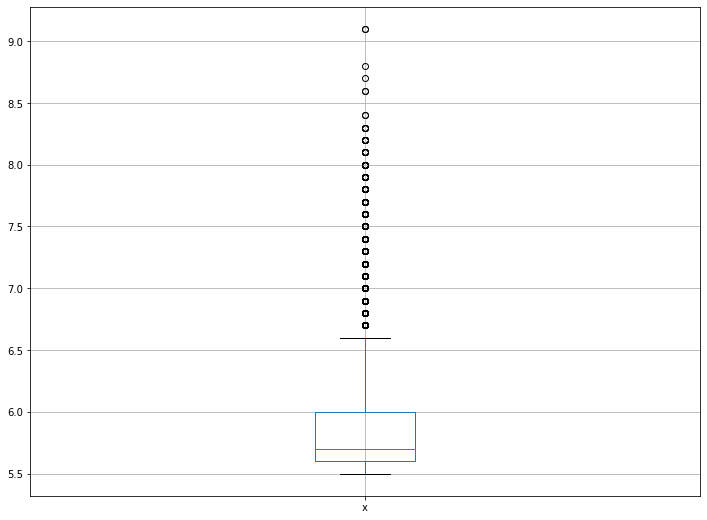

In [20]:
#Ahora dibujemos un diagrama de caja o de bigote (boxplot) con todos los datos de magnitud de los sismos registrados desde 1965 hasta 2016
#Diagrama de caja utilizando Pandas
fig = plt.figure(5, figsize=(12,9))  #definimos el tamaño del gráfico
boxplot1 = pd.DataFrame.boxplot(datos1['Magnitude'])

La mediana corresponde con la línea de color verde en la caja. Los límites de las cajas definen los percentiles 25 y 75%. 
Las líneas azules verticales son los "bigotes" y los puntos que se encuentran por encima del extremo superior corresponden con los valores atípicos o en inglés "outliers".

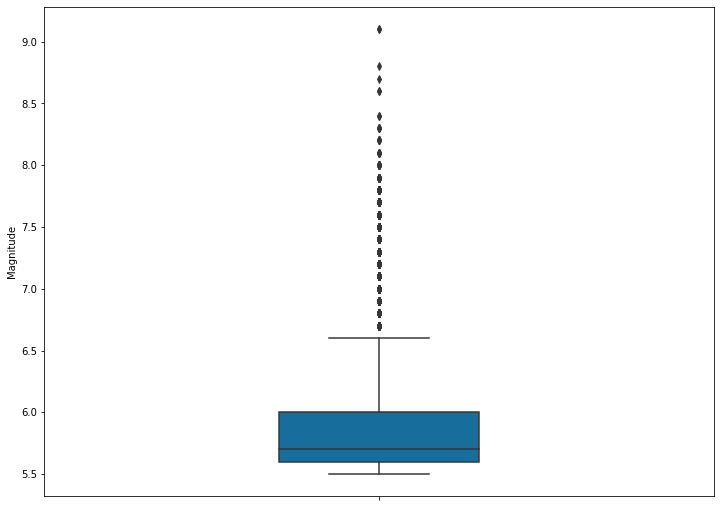

In [21]:
#Otra ventaja es que podemos realizar los gráficos mediante diferentes librerías:
#utilizando seaborn
fig2 = plt.figure(5, figsize=(12,9))
boxplot2 = sns.boxplot(y='Magnitude',
                 data=datos1, 
                 width=0.3,
                 palette="colorblind")

In [22]:
#Si quieres utilizar tus gráficos realizados en Jupyter, puedes exportarlos como jpg de la siguiente manera:
plot_file_name="boxplot.jpg"
#guardamos como formato jpeg
boxplot2.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)
#Puedes corroborar que ya está guardado tu gráfico, accediendo a la carpeta en la que estás trabajando

In [23]:
# También puedes hacer una tabla de frecuencias
tabla_frec=(datos1
  .groupby("Magnitude")
  .agg(Frequency=("Magnitude", "count")))
tabla_frec.head(15)


,Frequency
Magnitude,
5.50,4685
5.51,1
5.52,4
5.53,1
5.54,1
5.55,1
5.58,1
5.60,3967
5.62,1


¿Qué observas con las frecuencias de los datos? Notaste que la mayoría de los sismos tienen magnitud de 5.50, 5.60, 5.70, etc. ¿Por qué piensas que ocurre esto?

Como ejercicio, puedes analizar la magnitud de los sismos por año y ver si los datos tienen cambios importantes en su distribución año con año.



**Referencias:**

1. National Earthquake Information Center (NEIC). (n.d.). Usgs.Gov. Recuperado el 25 de septiembre de 2021, de https://www.usgs.gov/natural-hazards/earthquake-hazards/national-earthquake-information-center-neic?qt-science_support_page_related_con=3

**Este producto docente ha sido financiado por la DGAPA-UNAM a través del proyecto PAPIME PE101020 “Geología desde los ojos de un dron: una poderosa herramienta educativa para los actuales ingenieros de la Tierra”.**